<a href="https://colab.research.google.com/github/dd00697/COM3001Project/blob/main/NetworkIntrusionDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
api_token = {'username':'dan3400','key':'9b82535427f04dc819df62ffb3dc2415'}

import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

os.makedirs('/root/.kaggle/', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [2]:
!kaggle datasets download cicdataset/cicids2017

Dataset URL: https://www.kaggle.com/datasets/cicdataset/cicids2017
License(s): copyright-authors
 99% 227M/230M [00:03<00:00, 80.5MB/s]
100% 230M/230M [00:03<00:00, 63.8MB/s]


In [3]:
!unzip cicids2017.zip

Archive:  cicids2017.zip
  inflating: MachineLearningCSV.md5  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  


In [7]:
# manages gpu memory usage

gpus = tf.config.experimental.list_physical_devices('GPU') # lists the gpus available
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as error:
        print(error)

In [8]:
# Load the dataset
dataset_path = 'MachineLearningCSV/MachineLearningCVE'
files = os.listdir(dataset_path)

#Combine all files into one
data = pd.concat([pd.read_csv(os.path.join(dataset_path, file)) for file in files])

In [9]:
data.info() #Displays the shape of the dataset and a summary of data types.

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [10]:
#Searches the database for missing values and removes them.
missing_vals = data.isnull().sum()
print('Num missing vals:')
print(missing_vals[missing_vals > 0])

clean_data = data.dropna()

print(f'Datashape before removing missing vals: {data.shape}')
print(f'Datashape after removing: {clean_data.shape}')

data = data.dropna()

Num missing vals:
Flow Bytes/s    1358
dtype: int64
Datashape before removing missing vals: (2830743, 79)
Datashape after removing: (2829385, 79)


In [11]:
#Searches the database for columns containing only 0 values and removes them.
zero_cols = (data == 0).all()

# Print out columns containing zeros
print('Columns containing 0s:')
print(zero_cols[zero_cols].index.tolist())

# Remove these columns from the DataFrame
data= data.drop(columns=zero_cols[zero_cols].index)


Columns containing 0s:
[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


Traffic Type
Benign    2272688
Attack     556697
Name: count, dtype: int64


<ipython-input-12-c054f202c4f0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_count .index, y=traffic_count.values, palette=['skyblue', 'red'])


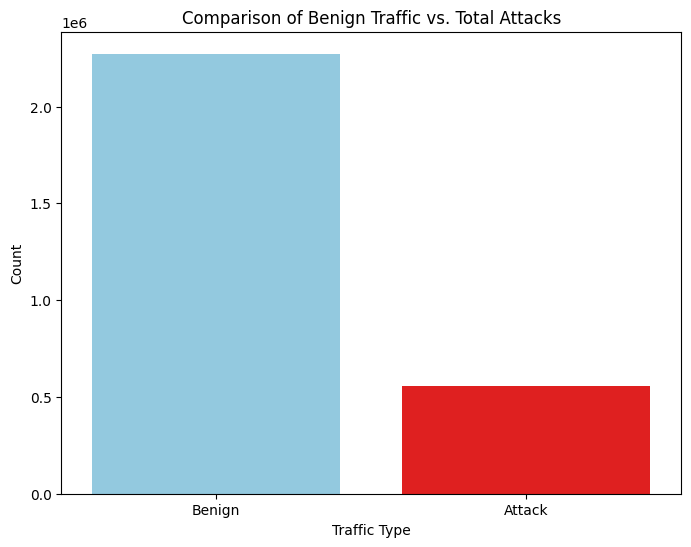

In [12]:
#This code plots a graph of the number of benign attacks in comparison to the numer of total attacks.
#Creates a Traffic Type Column which labels traffic as either bengin or attack.
data['Traffic Type'] = data[' Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

print(data['Traffic Type'].value_counts()) #Displays ammount of data in traffic type

# Count the number of each category in traffic Type
traffic_count = data['Traffic Type'].value_counts()

# Plots data
plt.figure(figsize=(8, 6))
sns.barplot(x=traffic_count .index, y=traffic_count.values, palette=['skyblue', 'red'])
plt.title('Comparison of Benign Traffic vs. Total Attacks')
plt.ylabel('Count')
plt.xlabel('Traffic Type')
plt.xticks(rotation=0)
plt.show()
